# Assignment 1. Rufina Talalaeva BS18-SB01
## Linear/Polynomial Regression
I created a synthetic dataset by sampling from data generated by adding some random Gaussian noise to a sinusoidal function as it was asked in the task.

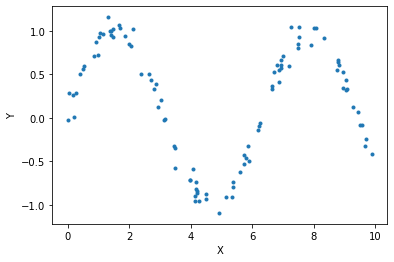

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

rng = np.random.RandomState(1)
x = 10 * rng.rand(100)
y = np.sin(x) + 0.1 * rng.randn(100)
x = pd.DataFrame(x)
y = pd.DataFrame(y)

# plot our dataset
plt.scatter(x, y, marker='.')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

### Evaluate the models’ accuracy using cross-validation with k=10

In [2]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

# check the degrees of polynomial from 1 to 100
degrees = [i for i in range(1,101)]
# array for errors
errors = []

for i in range(len(degrees)):
    # modelling the polynomial regression
    polynomial_features = PolynomialFeatures(degree=degrees[i], include_bias=False)
    
    polyreg = Pipeline([("polynomial_features", polynomial_features),
                         ("linear_regression", LinearRegression())])
    
    # fitting a train data to the model
    polyreg.fit(x, y)
    
    # Evaluate the model using crossvalidation with k=10
    scores = cross_val_score(polyreg, x, y, scoring="neg_mean_squared_error", cv=10)
    
    # report MSE and std to the console
    print(f'Degree of the model: {degrees[i]}, MSE: {-scores.mean()}, STD: {scores.std()}')
    
    # adding MSEs to global array of errors
    errors.append(-scores.mean())

Degree of the model: 1, MSE: 0.43369470619359046, STD: 0.1051808064143126
Degree of the model: 2, MSE: 0.3526088569905793, STD: 0.07199699002366176
Degree of the model: 3, MSE: 0.34735641978543097, STD: 0.08648532903116837
Degree of the model: 4, MSE: 0.04966582478034577, STD: 0.027488920919059273
Degree of the model: 5, MSE: 0.04272424816299986, STD: 0.01765067770025737
Degree of the model: 6, MSE: 0.01031006885603887, STD: 0.005499550210499254
Degree of the model: 7, MSE: 0.010422291100951974, STD: 0.005280319825401955
Degree of the model: 8, MSE: 0.010210403248304266, STD: 0.006100613136365388
Degree of the model: 9, MSE: 0.010635634377219117, STD: 0.006276211123372755
Degree of the model: 10, MSE: 0.011098102105814769, STD: 0.006401791242393921
Degree of the model: 11, MSE: 0.011340691547972095, STD: 0.006500612393046645
Degree of the model: 12, MSE: 0.01197003826654221, STD: 0.006725123738229954
Degree of the model: 13, MSE: 0.017192033521931042, STD: 0.01645835185362682
Degree of

### Choose the degree of the model according to the model’s performance.

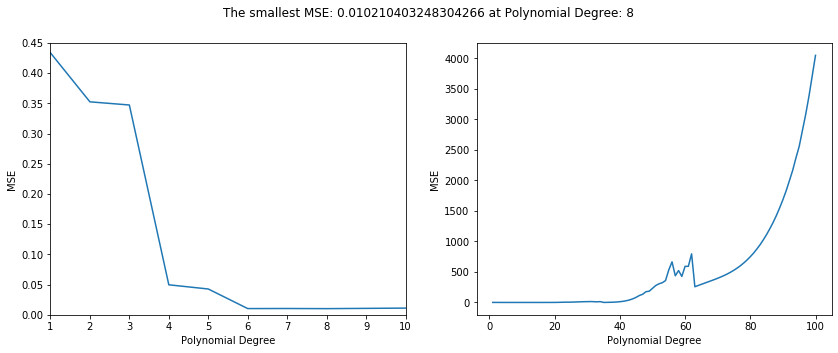

In [3]:
# find best degree of the model according to the minimum of MSE
best_degree = degrees[errors.index(min(errors))]

# plot MSEs for each degree
# the first plot is enlarged version of the second one to see how small is the error
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))
fig.suptitle(f'The smallest MSE: {min(errors)} at Polynomial Degree: {best_degree}')

ax1.plot(degrees, errors)
ax1.set_xlim([1,10])
ax1.set_ylim([0,0.45])
ax1.set_xlabel('Polynomial Degree')
ax1.set_ylabel('MSE')

ax2.plot(degrees, errors)
ax2.set_xlabel('Polynomial Degree')
ax2.set_ylabel('MSE')

plt.show()

### Plot the prediction of the model on $X_{test}$

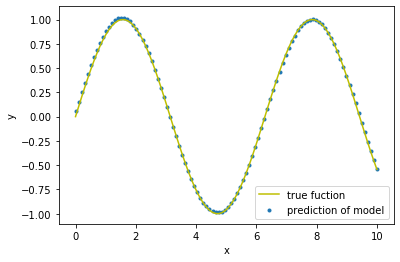

In [4]:
# generate the test data
X_test = np.linspace(0, 10, 100)
Y_test = np.sin(X_test)
# plot the true function y_test on x_test
plt.plot(X_test, Y_test, 'y', label='true fuction')

x_test = pd.DataFrame(X_test)
y_test = pd.DataFrame(Y_test)

# polynomial regression model with the best degree 
polynomial_features = PolynomialFeatures(degree=best_degree, include_bias=False)
    
poly_reg = Pipeline([("polynomial_features", polynomial_features),
                        ("linear_regression", LinearRegression())])
   
# fit the model with the training data
poly_reg.fit(x, y)

# predict the response
y_pred = poly_reg.predict(x_test)

# plot the prediction of the model with the true function on the back
plt.scatter(x_test, y_pred, marker='.', label='prediction of model')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

### Apply L1 and L2 Regularizations

In [5]:
from sklearn.linear_model import Lasso, Ridge

# generate Lasso and Ridge and fit the models

lasso = Lasso(alpha=0.001)
L1_reg = Pipeline([("polynomial_features", polynomial_features),
                        ("linear_regression", lasso)])
L1_reg.fit(x, y)
l1_y_pred = L1_reg.predict(x_test)


ridge = Ridge(alpha=0.1)
L2_reg = Pipeline([("polynomial_features", polynomial_features),
                        ("linear_regression", ridge)])

L2_reg.fit(x, y)
l2_y_pred = L2_reg.predict(x_test)

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6.6494998328655335, tolerance: 0.004248014559176562
  model = cd_fast.enet_coordinate_descent(
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.82246e-18): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,


### Compare Polynomial Regression of best degree with and without regularization
Here we can see that the model with L2 regularization is a little bit better than model without any regularizations.

MSEs of Polynomial regression:
without regularizations: 0.011054430004517203
with L1: 0.31250186132838065
with L2: 0.009346877190149885


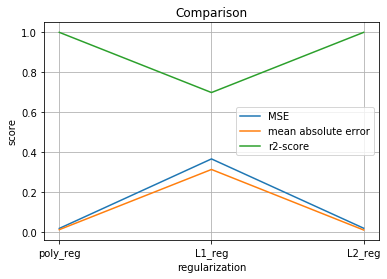

In [6]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# for each model predictions show mean absolute error, MSE and r2-score
results = [[],[],[]]
regressions = [poly_reg, L1_reg, L2_reg]
for i in regressions:
    y_pred = i.predict(x_test)
    results[0].append(mean_squared_error(y_test, y_pred, squared=False))
    results[1].append(mean_absolute_error(y_test, y_pred))
    results[2].append(r2_score(y_test, y_pred))
    
plt.plot(['poly_reg', 'L1_reg', 'L2_reg'], results[0], label='MSE')
plt.plot(['poly_reg', 'L1_reg', 'L2_reg'], results[1], label='mean absolute error')
plt.plot(['poly_reg', 'L1_reg', 'L2_reg'], results[2], label='r2-score')
plt.xlabel('regularization')
plt.ylabel('score')
plt.title('Comparison')
plt.legend()
plt.grid()

# show that the model with l2-regularization is doing better than without it.
print(f'MSEs of Polynomial regression:\nwithout regularizations: {results[1][0]}\nwith L1: {results[1][1]}\nwith L2: {results[1][2]}')

### Plot the model against the $X_{test}$ for the best model with and without regularization.

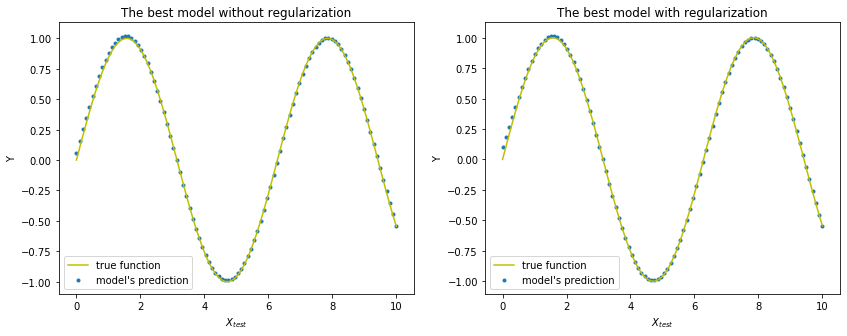

In [7]:
fig2, (ax_1, ax_2) = plt.subplots(1, 2, figsize=(14, 5))

ax_1.plot(X_test, Y_test, 'y', label='true function')
ax_1.scatter(x_test, poly_reg.predict(x_test), marker='.', label='model\'s prediction')
ax_1.set_xlabel('$X_{test}$')
ax_1.set_ylabel('Y')
ax_1.set_title('The best model without regularization')
ax_1.legend()

ax_2.plot(X_test, Y_test, 'y', label='true function')
ax_2.scatter(x_test, L2_reg.predict(x_test), marker='.', label='model\'s prediction')
ax_2.set_xlabel('$X_{test}$')
ax_2.set_ylabel('Y')
ax_2.set_title('The best model with regularization')
ax_2.legend()

plt.show()

## Logistic Regression. Data Reading and preprocessing
### Step 1: Import the libraries

In [8]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from  sklearn.linear_model import LogisticRegression
from sklearn import metrics

### Step 2: Import the dataset

In [9]:
data = pd.read_csv('banking.csv')
x = data.loc[:, :'nr_employed']
y = data['y']

### Step 3: Encode the Categorical data

In [10]:
# here we want to know how many and which ones are categorical features
types = data.dtypes
print("Number categorical featues:", sum(types=='object'))
print(types)

Number categorical featues: 10
age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays             float64
previous            int64
poutcome           object
emp_var_rate      float64
cons_price_idx    float64
cons_conf_idx     float64
euribor3m         float64
nr_employed       float64
y                   int64
dtype: object


In [11]:
# initialize one hot encoder for encoding categorical data
encoder = OneHotEncoder(handle_unknown="ignore", sparse=False)

# write down all categorical features
categorical_features = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome']
# fit them to encoder
encoder.fit(x[categorical_features])

def ohe_new_features(df, feature_name, encoder):
    # transform the encoder and get new features
    new_feats = encoder.transform(df[feature_name])
    
    # make up new columns for categorical features
    new_cols = pd.DataFrame(new_feats, dtype=int)
    
    # concatinate previous Dateframe with new columns with encoded categorical features
    new_df = pd.concat([df, new_cols], axis=1)
    
    # delete those columns that correspond to categorical features, encoded ones will stay
    new_df.drop(feature_name, axis=1, inplace=True)
    
    # return updated dataframe
    return new_df

# update the features to be ints
x = ohe_new_features(x, categorical_features, encoder)

### Step 4: Check out the missing values and impute them using the mean value strategy.

In [12]:
def count_nans(df):
    return pd.isna(df).sum().sum()

print(f"Number of missing cells in train: {count_nans(x)}")

imputer = SimpleImputer(strategy='mean')
imputer.fit(x)
x_imputed = imputer.transform(x)

print(f"Number of missing cells in train after imputation: {count_nans(x_imputed)}")

Number of missing cells in train: 4
Number of missing cells in train after imputation: 0


### Step 5: Feature scaling

In [13]:
scaler = RobustScaler()
x_imputed = scaler.fit_transform(x_imputed)

### Step 6: Splitting the dataset into Training (80 %) and Test set (20 %)

In [14]:
x_train, x_test, y_train, y_test = train_test_split(x_imputed, y, test_size=0.2, stratify=y)

## Logistic Regression. Model Creation

In [15]:
# different variations of Logistic Regression
param_grid = [{'penalty': ['l1','l2'],
               'solver': ['liblinear'],
               'C': np.logspace(-4, 4, 20)},
              {'penalty': ['l2'],
               'solver': ['lbfgs'],
               'C': np.logspace(-4, 4, 20)}]

# using Grid-Search-CV with variations for choosing the best hyper-parameters of the model
grid_search_clf = GridSearchCV(estimator=LogisticRegression(), cv = 7, param_grid = param_grid, n_jobs=-1, verbose=1)

In [16]:
# find the best set of hyper-parameters for the model
grid_search_clf.fit(x_train, y_train)
print("Best parameters set found on development set:")
print()
print(grid_search_clf.best_params_)

Fitting 7 folds for each of 60 candidates, totalling 420 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    3.1s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 420 out of 420 | elapsed:  2.5min finished


Best parameters set found on development set:

{'C': 4.281332398719396, 'penalty': 'l1', 'solver': 'liblinear'}


In [17]:
# evaluate the model on the separate test data-set and report: Accuracy, Precision, and Recall.
y_pred = grid_search_clf.predict(x_test)

print(f"Accuracy: {metrics.accuracy_score(y_test, y_pred)}")
print(f'Precision: {metrics.precision_score(y_test, y_pred)}')
print(f'Recall: {metrics.recall_score(y_test, y_pred)}')
print(f'F1-score: {metrics.f1_score(y_test, y_pred)}')
# as we can see accuracy is high, however f1-score is only ~50%, which is not quite good

Accuracy: 0.9122359796067007
Precision: 0.680140597539543
Recall: 0.4170258620689655
F1-score: 0.5170340681362725
